<a href="https://colab.research.google.com/github/lingzhou0/math412-fall2025/blob/main/persistent_homology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ripser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.3/827.3 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.0 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=4ea4266fb5313c755e4e85d288e68050ad4afc16d0a385e0754e40c36d52676e
  Stored in directory: /root/.cache/pip/wheels/2a/fd/fe/f4b8fd82894e1d9e04040ef41dc5ae6eb7a8e9b0ef5a9402fe
Successfully built hopcroftkarp


In [3]:
# topological data analysis
from ripser import ripser
from persim import plot_diagrams

# plotting and visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

# Numerical
from scipy.spatial import distance
from scipy.interpolate import CubicSpline
from scipy.stats import kendalltau
import numpy as np

In [17]:
def plot_barcodes(diagrams, alpha_max, width = 1.5):
    max_dim = len(diagrams)
    fig, axs = plt.subplots(max_dim)
    fig.suptitle('Barcodes')
    for dim in range(max_dim):
        barcode = np.copy(diagrams[dim])
        ind_inf = np.isinf(barcode.T[1])
        barcode[ind_inf, 1] = alpha_max
        h = 1
        for i in range(len(barcode)):
            x = barcode[i]
            y = [h,h]
            axs[dim].plot(x, y, linestyle= '-', c='#1f77b4', linewidth = width)
            if ind_inf[i]:
                axs[dim].scatter([alpha_max],[h],  s=10, marker='>', c='#1f77b4')
            h += 1
        axs[dim].set_xlim(0, 1.05*alpha_max)
        axs[dim].set_ylim(0,h)
        axs[dim].get_yaxis().set_ticks([]);
        axs[dim].spines['right'].set_color('none')
        axs[dim].spines['top'].set_color('none')
        axs[dim].text(0.3,1,'$\mathrm{barc}_{'+str(dim)+'}(X)$', verticalalignment='bottom')

<>:22: SyntaxWarning:

invalid escape sequence '\m'

<>:22: SyntaxWarning:

invalid escape sequence '\m'

/tmp/ipython-input-1506188069.py:22: SyntaxWarning:

invalid escape sequence '\m'



### Data sets


In [18]:
np.random.seed(1223)

n_data = 30
theta = np.random.uniform(0, 2*np.pi, n_data)
data = np.array([np.cos(theta) , np.sin(theta) , np.zeros_like(theta)]).T
data += np.random.normal(0, 0.08, data.shape)

fig = go.Figure(data=[go.Scatter3d(
    x=data.T[0], y=data.T[1], z=data.T[2],
    mode ='markers',
    marker=dict(size = 3 , color = 'grey'))])

fig.update_layout(scene= dict(zaxis = dict(range=[-1, 1])))
fig.show()



---



### Vietoris-Rips Filtration

Given a dataset (metric sapce) $(X,\mathbf{d}_X)$, its Rips filtration is defined as:

$$\Big\{\,  \mathrm{VR}_\alpha(X,\mathbf{d}_X) \Big\}_{ \alpha \geq 0} $$
where
$$\mathrm{VR}_\alpha(X, \mathbf{d}_X) = \Big\{\, \{x_0 , \ldots, x_k\} \subseteq X  \;\; : \;\;  \max_{0 \leq i \leq j \leq k} \mathbf{d}_X(x_i, x_j) \leq \alpha\, \Big\} $$

**Do:** Use the cell below to visualize the Rips complex of $X$ at various distance thresholds $\alpha \geq 0 $.

**Question:** find the values $\alpha$ such that the following betti numbers are achieved.

1.   $\beta_0(\mathrm{VR}_\alpha(X, \mathbf{d}_X)) = 5$   when  $\alpha =  $

2.   $\beta_1(\mathrm{VR}_\alpha(X, \mathbf{d}_X)) = 1$   when  $\alpha = $

3.   $\beta_0(\mathrm{VR}_\alpha(X, \mathbf{d}_X)) = 1$ and  $\beta_1(\mathrm{VR}_\alpha(X, \mathbf{d}_X)) = 0 $
 when $\alpha = $

In [19]:
alpha = 0.5 # Change this value!!

distMat = distance.squareform(distance.pdist(data))

ii = []; jj = []; kk = []
e_x =[]; e_y =[]; e_z =[]

for i in range(n_data):
    for j in range(i+1,n_data):
        if distMat[i,j] < alpha:
            # add edge (i,j)
            e_x.extend([data[i,0], data[j,0], None])
            e_y.extend([data[i,1], data[j,1], None])
            e_z.extend([data[i,2], data[j,2], None])

            for k in range(j+1,n_data):
                if np.max([distMat[j,k], distMat[i,k]]) < alpha:
                    # add triangle (i,j,k)
                    ii.append(i); jj.append(j); kk.append(k)

vertices = go.Scatter3d(mode = 'markers', name = 'vertices',
                        x = data.T[0], y = data.T[1],  z = data.T[2],
                        marker=dict(size = 3 , color = 'grey'))

edges = go.Scatter3d(mode='lines', name = 'edges',
                     x=e_x, y=e_y, z=e_z,
                     line=dict(color= 'rgb(70,70,70)', width=1))

triangles = go.Mesh3d(x=data.T[0], y=data.T[1], z=data.T[2],  i = ii, j = jj, k = kk,  color='lightpink', opacity=0.2)

fig = go.Figure(data=[vertices, edges, triangles])
fig.update_traces(hoverinfo="none")
fig.update_layout(scene= dict(
                      xaxis = dict(showspikes=False),
                      yaxis = dict(showspikes=False),
                      zaxis = dict(showspikes=False,range=[-1, 1])))
fig.show()

### Computing Persistence via Ripser

U. Bauer: "Ripser is a lean C++ code for the computation of Vietoris–Rips persistence barcodes. It can do just this one thing, but does it extremely well."

Original C++ library : https://github.com/Ripser/ripser

Accompanying paper : https://arxiv.org/pdf/1908.02518.pdf

Python library: https://ripser.scikit-tda.org/en/latest


In [20]:
# Persistence Computation
rips_persistence = ripser(data, maxdim=1)
dgms = rips_persistence['dgms']

In [21]:
for p in range(len(dgms)):
  print(f'Dimension {p} barcode is:')
  print(dgms[p])
  print('-----')

Dimension 0 barcode is:
[[0.         0.02303324]
 [0.         0.04554395]
 [0.         0.04757342]
 [0.         0.06894211]
 [0.         0.07880332]
 [0.         0.08043761]
 [0.         0.0826071 ]
 [0.         0.09708968]
 [0.         0.10534447]
 [0.         0.1171549 ]
 [0.         0.13722087]
 [0.         0.15364076]
 [0.         0.19431935]
 [0.         0.19562533]
 [0.         0.22346257]
 [0.         0.22679417]
 [0.         0.23285373]
 [0.         0.25602233]
 [0.         0.25981766]
 [0.         0.27338797]
 [0.         0.27659839]
 [0.         0.29259834]
 [0.         0.29771644]
 [0.         0.30595097]
 [0.         0.34777886]
 [0.         0.53958714]
 [0.         0.56798708]
 [0.         0.60519713]
 [0.         0.65744728]
 [0.                inf]]
-----
Dimension 1 barcode is:
[[0.77546424 1.68482399]]
-----


### Barcode

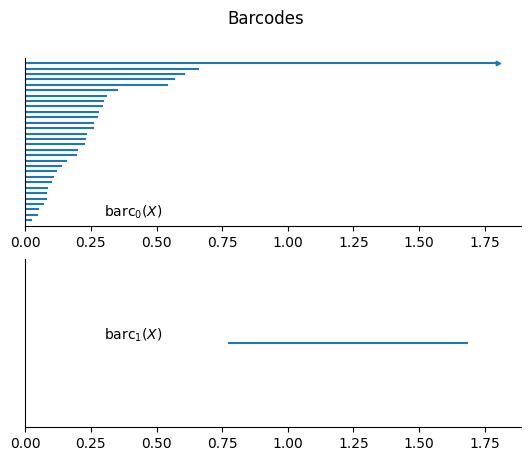

In [22]:
plot_barcodes(dgms,1.8);

### Persistence diagrams

$$ \mathrm{dgm}_p(X) = \Big\{ (a,b) \in \mathbb{R}^2 \;\; : \;\; [a,b) \in \mathrm{barc}_p(X)  \Big\}$$

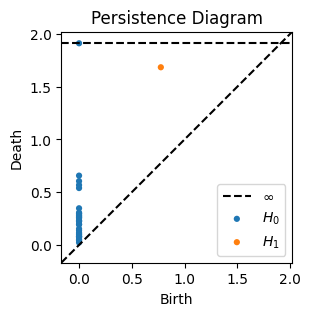

In [24]:
plt.figure(figsize = (3,3))
plot_diagrams(dgms, title='Persistence Diagram')

# More examples

In [27]:
from sklearn.datasets import make_circles, make_blobs
from itertools import combinations
from matplotlib.patches import Polygon

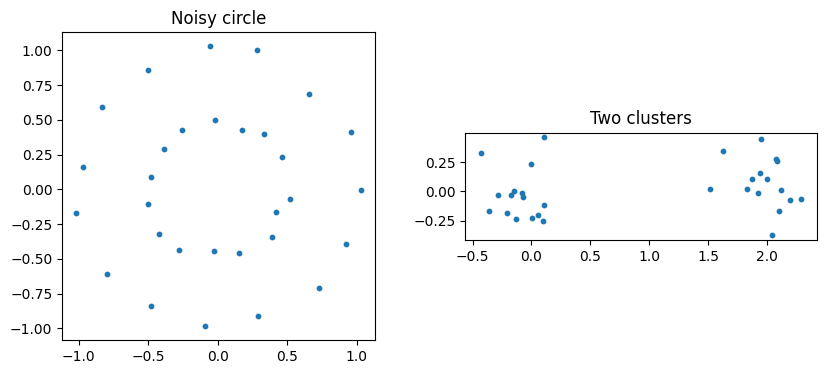

In [43]:
circle_pts, _ = make_circles(n_samples=30, factor=0.5, noise=0.03, random_state=1)
blobs, _ = make_blobs(n_samples=30, centers=[[0,0],[2,0]], cluster_std=0.2, random_state=2)

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].scatter(circle_pts[:,0], circle_pts[:,1], s=10)
axes[0].set_title('Noisy circle')
axes[0].set_aspect('equal')
axes[1].scatter(blobs[:,0], blobs[:,1], s=10)
axes[1].set_title('Two clusters')
axes[1].set_aspect('equal')
plt.show()

In [46]:
def plot_rips_complex(points, r, ax=None, node_color='C0'):
    """Plot VR complex up to triangles for given radius r.
    points: (n,2) array
    r: threshold distance
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(5,5))
    pts = np.asarray(points)
    n = len(pts)
    D = np.linalg.norm(pts[:,None,:] - pts[None,:,:], axis=2)
    edges = [(i,j) for i,j in combinations(range(n),2) if D[i,j] <= r]
    triangles = []
    for (i,j,k) in combinations(range(n),3):
        if D[i,j] <= r and D[i,k] <= r and D[j,k] <= r:
            triangles.append((i,j,k))
    for tri in triangles:
        poly = Polygon(pts[list(tri)], facecolor='C1', alpha=0.25, edgecolor=None)
        ax.add_patch(poly)
    for i,j in edges:
        ax.plot([pts[i,0], pts[j,0]], [pts[i,1], pts[j,1]], color='k', linewidth=0.8, alpha=0.7)
    ax.scatter(pts[:,0], pts[:,1], s=40, color=node_color, zorder=3)
    ax.set_aspect('equal')
    ax.set_title(f'r={r:.2f}, V={n}, E={len(edges)}, F={len(triangles)}')
    return ax

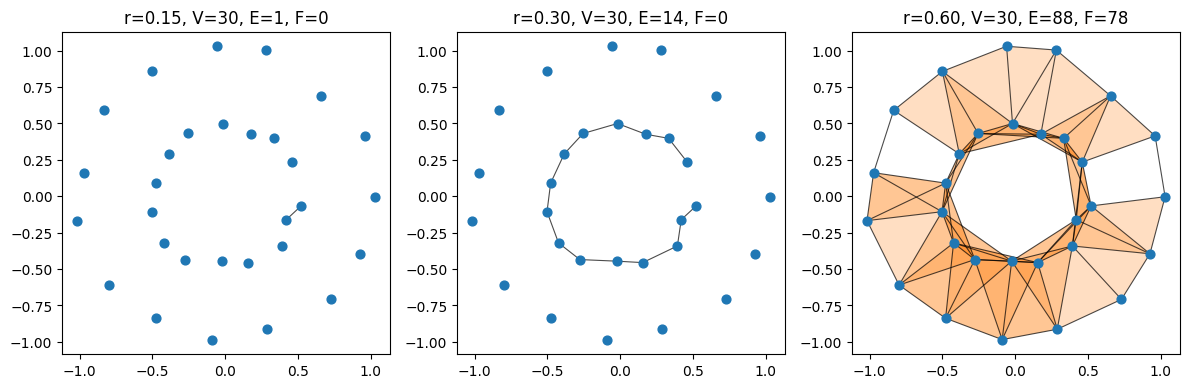

In [47]:
alphas = [0.15, 0.3, 0.6]
fig, axs = plt.subplots(1,3, figsize=(12,4))
for ax, r in zip(axs, alphas):
    plot_rips_complex(circle_pts, r, ax=ax)
plt.tight_layout()
plt.show()

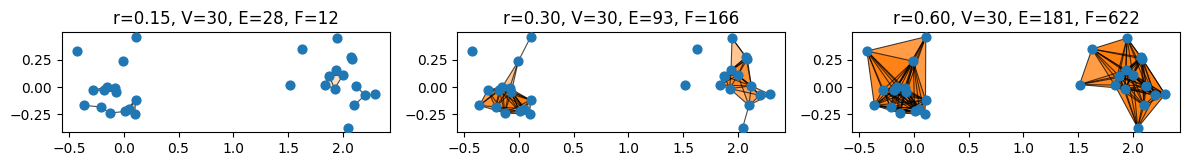

In [48]:
alphas = [0.15, 0.3, 0.6]
fig, axs = plt.subplots(1,3, figsize=(12,4))
for ax, r in zip(axs, alphas):
    plot_rips_complex(blobs, r, ax=ax)
plt.tight_layout()
plt.show()